In [176]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Расчёт диаграмм направленности различных видов излучателей

- элемент Гюйгенса
- симметричный вибратор
***

In [177]:
#Параметры антенны
lmd = 3 #см

#Зададим точность рассчёта ДН (количество точек) и интервал расчёта
N = 100
theta_min = -np.pi
theta_max = np.pi
dtheta = (theta_max - theta_min) / (N - 1)

theta = np.zeros(N)
for i in range(N):
    theta[i] = theta_min + i * dtheta

to_rad = np.pi / 180
to_deg = 180 / np.pi

## 1. *Элемент Гюйгенса*
F(theta) = (1+cos(theta))/2

In [178]:
def Huygens(theta):
    F = np.zeros(len(theta))
    #F = (1 + np.cos(theta))/2
    for i in range(len(F)):
        F[i] = (1 + np.cos(theta[i])) / 2
    return (F, theta)

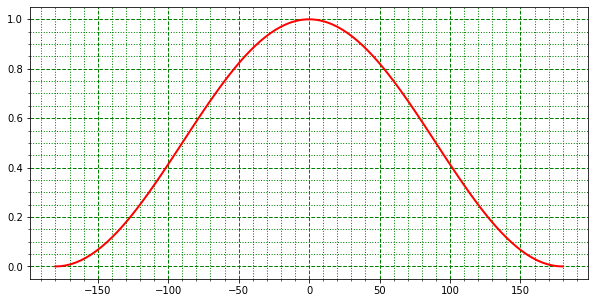

In [186]:
F_Huygens = Huygens(theta)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(F_Huygens[1] * to_deg, F_Huygens[0], 'r', linewidth=2, markersize=5)
ax.minorticks_on()
ax.grid(which='major', 
        color = 'g',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '--')    #  начертание
ax.grid(which='minor', 
        color = 'g',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = ':')    #  начертание
plt.show()

## 2. *Симметричный вибратор*
F(theta) = (cos(kl sin(theta)) - cos(kl))/(cos(theta) * (1 - cos(kl)))

In [180]:
def Vibrator(lenght, theta):
    F = np.zeros(len(theta))
    kl = lenght * 2 * np.pi / lmd
    F = (np.cos(kl * np.sin(theta)) - np.cos(kl)) / (np.cos(theta) * (1 - np.cos(kl)))
    return (F, theta)

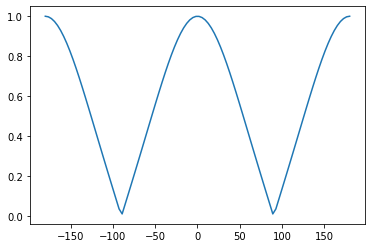

In [181]:
#F_Vibrator = Vibrator(lmd/4, theta)

fig, ax = plt.subplots()
ax.plot(Vibrator(lmd/4, theta)[1]*to_deg, abs(Vibrator(lmd/4, theta)[0]))
plt.show()

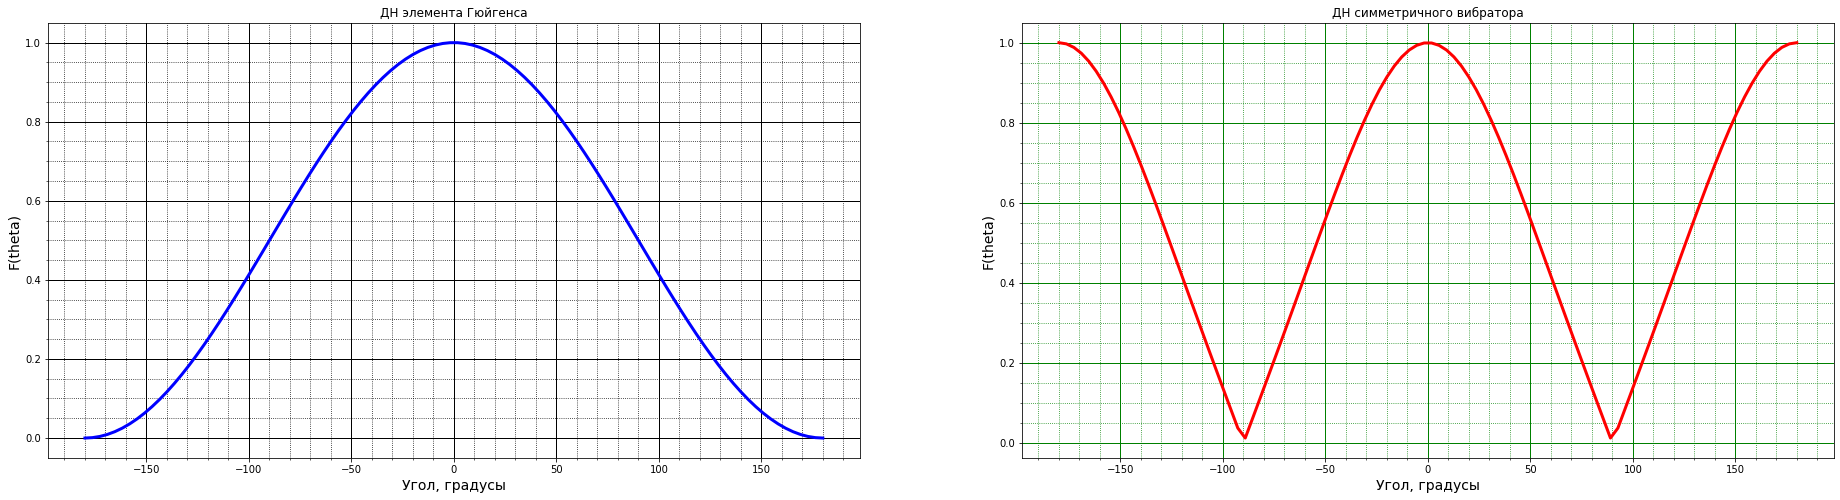

In [182]:
fig, ax = plt.subplots(1, 2, figsize = (32,8))
ax[0].plot(F_Huygens[1] * to_deg, F_Huygens[0], 'b-', linewidth=3, markersize=5)
ax[1].plot(Vibrator(lmd/4, theta)[1] * to_deg, abs(Vibrator(lmd/4, theta)[0]), 'r', linewidth=3, markersize=5)

ax[0].set_title('ДН элемента Гюйгенса')
ax[1].set_title('ДН симметричного вибратора')

ax[0].set_xlabel('Угол, градусы', fontsize = 14)
ax[1].set_xlabel('Угол, градусы', fontsize = 14)

ax[0].set_ylabel('F(theta)', fontsize = 14)
ax[1].set_ylabel('F(theta)', fontsize = 14)

#  Прежде чем рисовать вспомогательные линии
#  необходимо включить второстепенные деления
#  осей:
ax[0].minorticks_on()
ax[1].minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax[0].grid(which='major', color = 'k', linewidth = 1)
ax[1].grid(which='major', color = 'g', linewidth = 1)

#  Определяем внешний вид линий вспомогательной сетки:
ax[0].grid(which='minor', color = 'k', linestyle = ':')
ax[1].grid(which='minor', color = 'g', linestyle = ':')

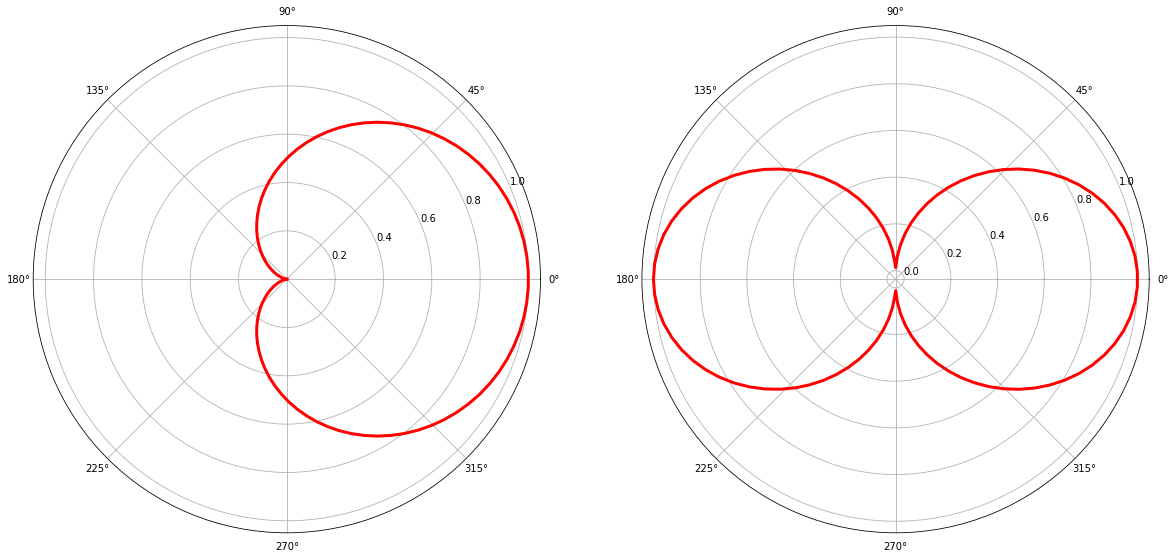

In [183]:
fig = plt.figure()
ax1 = fig.add_subplot(121, polar=True)   
ax1.plot(F_Huygens[1], F_Huygens[0], 'r', linewidth = 3)
ax2 = fig.add_subplot(122, polar = True)
ax2.plot(Vibrator(lmd/4, theta)[1], abs(Vibrator(lmd/4, theta)[0]), 'r', linewidth = 3)
fig.set_figheight(12)
fig.set_figwidth(20)
plt.show()